# Evaluating relative pose estimations
This script aims to evaluate the relative pose estimations between image pairs in validation set.
Next, it looks into doing the same for query image and the nearest neighbours. The main experiment script should be executed first to obtain relative pose estimations (found in est_rel_poses.txt).

In [19]:
import sys
sys.path.append("../")
import numpy as np
from os import path as osp
from scipy.spatial.transform import Rotation as R
from relposenet.utils import obtain_absolute_pose, obtain_relative_pose 

## Validation Set
Convert relative pose to absolute pose of anchor images based on absolute pose of paired image that are also from the validation set

In [30]:
data_root = 'D:/Imperial/FYP/captured_data/airsim_drone_mode/relative_pose/building_relative_v4'
train_seq = 'train'
test_seq = 'val'

train_poses, train_ims = [], []
val_poses, val_ims = [], []
with open(osp.join(data_root, train_seq, 'airsim_rec_0.txt'), 'r') as f:
	for line in f.readlines()[1::]:
		cur = line.split('\t')
		xyz = np.array([float(v) for v in cur[2:5]], dtype=np.float32)
		wxyz = np.array([float(v) for v in cur[5:9]], dtype=np.float32)
		train_poses.append(np.hstack([xyz,wxyz]))
		train_ims.append(f"/{train_seq}/images_0/" + cur[-1].strip('\n'))

with open(osp.join(data_root, test_seq, 'airsim_rec_0.txt'), 'r') as f:
	for line in f.readlines()[1::]:
		cur = line.split('\t')
		xyz = np.array([float(v) for v in cur[2:5]], dtype=np.float32)
		wxyz = np.array([float(v) for v in cur[5:9]], dtype=np.float32)
		val_poses.append(np.hstack([xyz,wxyz]))
		val_ims.append(f"/{test_seq}/images_0/" + cur[-1].strip('\n'))

In [36]:
data_root = 'D:/Imperial/FYP/new/RelPoseNet/output/relposenet/AirsimIMU/'
relative_pose_pred = []
absolute_pose_pred = []
i = 0
with open(osp.join(data_root, 'est_rel_poses_val.txt'), 'r') as f:
    for line in f.readlines():
        cur = line.split(' ')
        r_q = np.array([float(v) for v in cur[:4]], dtype=np.float32)
        r_t = np.array([float(v) for v in cur[4:]], dtype=np.float32)
        relative_pose = np.hstack([r_t, r_q])
        relative_pose_pred.append(relative_pose)
        a_t, a_q = obtain_absolute_pose(val_poses[i], relative_pose)
        absolute_pose_pred.append(np.hstack([a_t,a_q]))
        i += 1
		
absolute_pose_pred = np.vstack(absolute_pose_pred)
print(len(relative_pose_pred))
print(len(absolute_pose_pred))


179
179


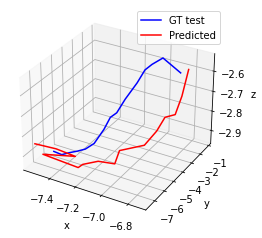

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib ipympl

data_root = 'D:/Imperial/FYP/captured_data/airsim_drone_mode/relative_pose/building_relative_v4'

test_data = pd.read_csv(osp.join(data_root, test_seq, 'airsim_rec_0.txt'), sep="\t")
train_data = pd.read_csv(osp.join(data_root, train_seq, 'airsim_rec_0.txt'), sep="\t")

plt.figure()
ax = plt.axes(projection= '3d')
ax.plot3D(test_data["POS_X"][1+2:16+2], test_data["POS_Y"][1+2:16+2], test_data["POS_Z"][1+2:16+2], label = "GT test", color = 'blue')
ax.plot3D(list(absolute_pose_pred[:15,0]), list(absolute_pose_pred[:15,1]), list(absolute_pose_pred[:15,2]), label = "Predicted", color = "red")
# ax.scatter3D(list(absolute_pose_pred[:,0]), list(absolute_pose_pred[:,1]), list(absolute_pose_pred[:,2]), label = "Predicted", color = "red")
# ax.scatter3D(train_data["POS_X"], train_data["POS_Y"], train_data["POS_Z"], label = "GT train", color='green')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()

## Inference Method
Do the same for query image and the nearest neighbours in training dataset.

In [ ]:
val_ims = []
database_ims = []
val_poses = []
database_imgs_poses = []

with open(osp.join('.','assets','data', 'nn_airsim.txt'), 'r') as f:
	for line in f.readlines():
		cur = line.split(' ')
		val_ims.append(cur[0])
		database_ims.append(cur[1])
		val_pose = np.array([float(v) for v in cur[2:9]], dtype=np.float32)
		database_img_pose = np.array([float(v) for v in cur[9:]], dtype=np.float32)
		val_poses.append(val_pose)
		database_imgs_poses.append(database_img_pose)

In [ ]:
data_root = 'D:/Imperial/FYP/RelPoseNet/output/relposenet/airsim/'
relative_pose_pred = []
absolute_pose_pred = []
i = 0
with open(osp.join(data_root, 'est_rel_poses.txt'), 'r') as f:
	for line in f.readlines():
		cur = line.split(' ')
		r_q = np.array([float(v) for v in cur[:4]], dtype=np.float32)
		r_t = np.array([float(v) for v in cur[4:]], dtype=np.float32)
		relative_pose = np.hstack([r_t, r_q])
		relative_pose_pred.append(relative_pose)
		a_t, a_q = obtain_absolute_pose(database_imgs_poses[i], relative_pose)
		absolute_pose_pred.append(np.hstack([a_t,a_q]))
		i += 1
		
absolute_pose_pred = np.vstack(absolute_pose_pred)
database_imgs_poses = np.vstack(database_imgs_poses)
print(len(relative_pose_pred))
print(len(absolute_pose_pred))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib ipympl

data_root = 'D:/Imperial/FYP/captured_data/airsim_drone_mode/building_relative_v1'

test_data = pd.read_csv(osp.join(data_root, test_seq, 'airsim_rec.txt'), sep="\t")
train_data = pd.read_csv(osp.join(data_root, train_seq, 'airsim_rec.txt'), sep="\t")

plt.figure()
ax = plt.axes(projection= '3d')
num_plot = 50
ax.plot3D(test_data["POS_X"][:num_plot], test_data["POS_Y"][:num_plot], test_data["POS_Z"][:num_plot], label = "GT test", color = 'blue')
ax.plot3D(list(absolute_pose_pred[:num_plot,0][::5]), list(absolute_pose_pred[:num_plot,1][::5]), list(absolute_pose_pred[:num_plot,2][::5]), label = "Predicted", color = "red")
ax.plot3D(list(database_imgs_poses[:num_plot,0][::5]), list(database_imgs_poses[:num_plot,1][::5]), list(database_imgs_poses[:num_plot,2][::5]), label = "NN from database", color = "green")
# ax.scatter3D(list(absolute_pose_pred[:,0]), list(absolute_pose_pred[:,1]), list(absolute_pose_pred[:,2]), label = "Predicted", color = "red")
# ax.scatter3D(train_data["POS_X"], train_data["POS_Y"], train_data["POS_Z"], label = "GT train", color='green')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()